### 1. Import and read the data

In [1029]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
df=pd.read_csv(r"C:\Users\Administrator\Downloads\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Performing EDA

In [1030]:
#Finding the shape of the data (number of rows and columns)
df.shape

(1460, 81)

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1032]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1033]:
# Checking the value counts of all the columns...
for i in df.columns:
    print(df[i].value_counts())

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0     

Name: HeatingQC, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
796      5
1494     5
1422     5
520      5
1072     5
1080     5
616      5
798      5
1236     5
958      5
        ..
1223     1
1225     1
1229     1
1235     1
1238     1
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1272     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64
0       829
728      10
504       9
672       8
546       8
720       7
600       7
896       6
780      

### 3. Missing values treatment

In [1034]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [1035]:
# Dropping the columns with high percentage of missing values
df=df.drop('Alley',axis=1)
df=df.drop('PoolQC',axis=1)
df=df.drop('Fence',axis=1)
df=df.drop('MiscFeature',axis=1)
df=df.drop('FireplaceQu',axis=1)

In [1036]:
# Dropping columns that are highly skewed
df=df.drop('Street',axis=1)
df=df.drop('Utilities',axis=1)
df=df.drop('MoSold',axis=1)

In [1037]:
# Imputing the missing values with mean,median,mode for "continuous variables"
print(df['LotFrontage'].mean())
print(df['LotFrontage'].median())
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())

70.04995836802665
69.0


In [1038]:
print(df['MasVnrArea'].mean())
print(df['MasVnrArea'].median())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

103.68526170798899
0.0


In [1039]:
# Missing values treatment for "Categorical Variables"(MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,
# GarageType,GarageYrBuilt,GarageFinish,GarageQual,GarageCond)

# For 'MasVnrType' column.....As it is having only 0.55% missing values, so we can replace the missing values 
# with concrete bricks(ConBrks)
df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('ConBrks')

In [1040]:
# For 'BsmtQual' column.....As it is having only 2.53% missing values, so we can replace the missing values with NoBase
df['BsmtQual'].value_counts()
df['BsmtQual'] = df['BsmtQual'].fillna('NoBase')

In [1041]:
# For 'BsmtCond' column.....As it is having only 2.53% missing values, so we can replace the missing values with NoBase
df['BsmtCond'].value_counts()
df['BsmtCond'] = df['BsmtCond'].fillna('NoBase')

In [1042]:
# For 'BsmtExposure' column.....As it is having only 2.60% missing values, so we can replace the missing values with NoBase
df['BsmtExposure'].value_counts()
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBase')

In [1043]:
# For 'BsmtFinType1' column.....As it is having only 2.53% missing values, so we can replace the missing values with NoBase
df['BsmtFinType1'].value_counts()
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBase')

In [1044]:
# For 'BsmtFinType2' column.....As it is having only 2.53% missing values, so we can replace the missing values with NoBase
df['BsmtFinType2'].value_counts()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBase')

In [1045]:
# For 'Electrical' column.....As it is having only 0.1% missing values, so we can replace the missing values with the
# highest value unique value with SBrkr
df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [1046]:
# For 'GarageType' column.....As it is having only 5.55% missing values, so we can replace the missing values with NoGar
df['GarageType'].value_counts()
df['GarageType'] = df['GarageType'].fillna('NoGar')

In [1047]:
# For 'GarageYrBlt' column.....As it is having only 5.55% missing values, so we can replace the missing values with the
# highest value unique value i.e., with 2005
df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('2005')

In [1048]:
# For 'GarageFinish' column.....As it is having only 5.55% missing values, so we can replace the missing values with NoGar
df['GarageFinish'].value_counts()
df['GarageFinish'] = df['GarageFinish'].fillna('NoGar')

In [1049]:
# For 'GarageQual' column.....As it is having only 5.55% missing values, so we can replace the missing values with NoGar
df['GarageQual'].value_counts()
df['GarageQual'] = df['GarageQual'].fillna('NoGar')

In [1050]:
# For 'GarageCond' column.....As it is having only 5.55% missing values, so we can replace the missing values with NoGar
df['GarageCond'].value_counts()
df['GarageCond'] = df['GarageCond'].fillna('NoGar')

In [1051]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
                ... 
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual   

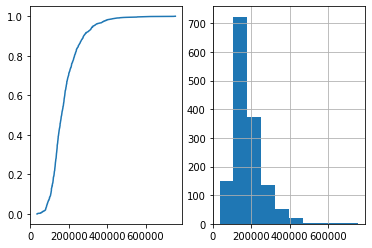

In [1052]:
# Cheking the target variable is Normally distributed are not.....
def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n+1) / n
    return x, y
x,y = ecdf(df["SalePrice"])
plt.subplot(1,2,1)
plt.plot(x, y)
plt.subplot(1,2,2)
df["SalePrice"].hist()

In [1053]:
# Converting the target variable by performing Log-Transformation
df['SalePrice']=np.log(df['SalePrice'])
df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

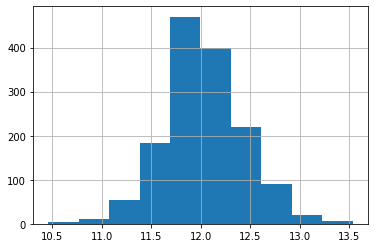

In [1054]:
df['SalePrice'].hist()

In [1055]:
# Converting the year columns('YearBuilt,GarageYrBlt,YrSold','YearRemodAdd') to age...
df['yrblt.age']=df['YearBuilt'].max()-df['YearBuilt']
df['GarageYrBlt'] = df['GarageYrBlt'].apply(np.int64)
df['Garyrblt.age']=df['GarageYrBlt'].max()-df['GarageYrBlt']
df['Yrsold.age']=df['YrSold'].max()-df['YrSold']
df['YrremodAdd.age']=df['YearRemodAdd'].max()-df['YearRemodAdd']

In [1056]:
# Dropping the columns'YearBuilt,GarageYrBlt,YrSold,YearRemodAdd'
df=df.drop('YearBuilt',axis=1)
df=df.drop('GarageYrBlt',axis=1)
df=df.drop('YrSold',axis=1)
df=df.drop('YearRemodAdd',axis=1)

In [1057]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
Id                1460 non-null int64
MSSubClass        1460 non-null int64
MSZoning          1460 non-null object
LotFrontage       1460 non-null float64
LotArea           1460 non-null int64
LotShape          1460 non-null object
LandContour       1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null object
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exterior2nd       1460 non-null object
MasVnrType        1460 non-null object
MasVnrArea        1460 non-null float64
ExterQual         1460 non-null object

In [1058]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,yrblt.age,Garyrblt.age,Yrsold.age,YrremodAdd.age
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,12.247694,7,7,2,7
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,WD,Normal,12.109011,34,34,3,34
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,12.317167,9,9,2,8
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,WD,Abnorml,11.849398,95,12,4,40
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,WD,Normal,12.429216,10,10,2,10


### 4. Data Preparation

#### Converting binary variables (Yes/No) to 1/0 

In [1059]:
# List of variables
varlist=['CentralAir']

# Appling map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})
# Appling the function to the list
df[varlist]=df[varlist].apply(binary_map)

#### For categorical with multiple levels, creating dummies

In [1060]:
col1=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Condition2','RoofMatl','Heating']
status=pd.get_dummies(df[col1],drop_first=True)
status.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall'],
      dtype='object', length=203)

In [1061]:
# Concatinating original with status
df=pd.concat([df,status],axis=1)
col= df.columns

In [1062]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall'],
      dtype='object', length=276)

In [1063]:
# Dropping original columns after creating dummies
df=df.drop(columns=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Condition2','RoofMatl','Heating'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,0,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,0,0,1,0,0,0,0


In [1064]:
df.shape

(1460, 240)

### 5. Feature Scaling

In [1065]:
from sklearn.preprocessing import StandardScaler

In [1066]:
scaler=StandardScaler()
df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','ScreenPorch','MiscVal','yrblt.age','Yrsold.age','Garyrblt.age','YrremodAdd.age']]=scaler.fit_transform(df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','ScreenPorch','MiscVal','yrblt.age','Yrsold.age','Garyrblt.age','YrremodAdd.age']])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,...,0,0,0,0,0,1,0,0,0,0
1,2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,...,0,0,0,0,0,1,0,0,0,0
2,3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,...,0,0,0,0,0,1,0,0,0,0
3,4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,...,0,0,0,0,0,1,0,0,0,0
4,5,0.073375,0.633618,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,...,0,0,0,0,0,1,0,0,0,0


### 6. Splitting into train and test

In [1067]:
import sklearn
from sklearn.model_selection import train_test_split

In [1068]:
# Putting feature variable to X
X = df.drop(['Id','SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,-0.459303,...,0,0,0,0,0,1,0,0,0,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,0.466465,...,0,0,0,0,0,1,0,0,0,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,-0.313369,...,0,0,0,0,0,1,0,0,0,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,...,0,0,0,0,0,1,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,0.199680,...,0,0,0,0,0,1,0,0,0,0


In [1069]:
# Putting response variable to y
y = df['SalePrice']
y = np.exp(y)
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [1070]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [1071]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
175,-0.872563,6.336182e-01,0.210283,-0.071836,1.280685,-0.57441,0.073168,-0.288653,0.357152,0.329652,...,0,0,0,0,0,1,0,0,0,0
1408,0.309859,-4.564744e-01,-0.278299,-1.518467,1.280685,-0.57441,-0.973018,-0.288653,0.123970,-0.992873,...,0,0,0,0,0,1,0,0,0,0
1148,-0.163109,6.454645e-16,-0.482752,0.651479,1.280685,-0.57441,-0.973018,-0.288653,0.010775,-1.106884,...,0,0,0,0,0,1,0,0,0,0
861,3.147673,2.248335e-01,0.111063,-0.795151,-1.416142,-0.57441,0.871515,-0.288653,-0.835923,-0.042023,...,0,0,0,0,0,1,0,0,0,0
220,-0.872563,1.339924e-01,-0.153022,0.651479,-0.517200,-0.57441,-0.973018,-0.288653,2.107147,1.004596,...,0,0,0,0,0,1,0,0,0,0


In [1072]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
930,-0.872563,0.133992,-0.159536,1.374795,-0.517200,-0.574410,-0.937926,-0.288653,1.998480,0.931629,...,0,0,0,0,0,1,0,0,0,0
530,0.546344,0.679039,-0.031753,-0.071836,-0.517200,0.638837,0.744306,-0.288653,0.250749,0.920228,...,0,0,0,0,0,1,0,0,0,0
1291,2.438219,-2.227875,-0.885645,-0.795151,1.280685,0.910294,-0.466375,-0.288653,-0.380879,-0.974631,...,0,0,0,0,0,1,0,0,0,0
1385,-0.163109,-1.364885,-0.509211,-1.518467,2.179628,-0.574410,0.639029,-0.288653,-1.146078,-0.596115,...,0,0,0,0,0,1,0,0,0,0
305,-0.872563,0.451936,-0.013112,1.374795,-0.517200,0.788416,2.237917,-0.288653,-0.070725,2.149264,...,0,0,0,0,0,1,0,0,0,0


In [1073]:
y_train.head()

175     243000.0
1408    125500.0
1148    116900.0
861     131500.0
220     204900.0
Name: SalePrice, dtype: float64

In [1074]:
y_test.head()

930     201000.0
530     175000.0
1291    119500.0
1385    125500.0
305     305900.0
Name: SalePrice, dtype: float64

### 7. Ridge and Lasso Regression

### Ridge Regression

In [1075]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# List of alpha to tune
params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,1.0,2.0,5.0,6.0,8.0,10.0,50,100,500]}
ridge=Ridge()

# Cross validation
folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 1.0, 2.0, 5.0, 6.0, 8.0, 10.0,
                                   50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1076]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019996,0.002532,0.003998,0.000003,0.0001,{'alpha': 0.0001},-18414.349571,-21503.476941,-19030.561027,-23974.487700,...,-21250.877149,2229.785230,19,-12217.748701,-12866.436174,-12343.187636,-11773.650686,-12410.289027,-12322.262445,351.058279
1,0.019996,0.000002,0.003198,0.001599,0.001,{'alpha': 0.001},-18458.848821,-21427.557312,-18983.214668,-23959.164330,...,-21212.980131,2204.808558,18,-12217.787711,-12865.102057,-12349.385943,-11773.244121,-12408.496908,-12322.803348,350.765317
2,0.017597,0.001959,0.002399,0.001959,0.01,{'alpha': 0.01},-18893.304896,-20842.975043,-18728.076988,-23822.507876,...,-20958.370040,1993.998527,17,-12307.476015,-12907.199846,-12483.775252,-11770.394608,-12464.208183,-12386.610781,366.731495
3,0.012006,0.000010,0.003992,0.000008,0.05,{'alpha': 0.05},-20275.473732,-19902.794025,-18736.946207,-23479.712689,...,-20809.880239,1627.246011,14,-12943.473911,-13501.307595,-13219.168871,-11792.621803,-13012.047353,-12893.723907,583.776277
4,0.013599,0.001967,0.001599,0.001959,0.1,{'alpha': 0.1},-20925.971220,-19454.437887,-19037.224158,-23316.638127,...,-20845.870111,1531.528050,15,-13404.572550,-14134.554214,-13837.440780,-11822.918788,-13588.846750,-13357.666616,805.584620


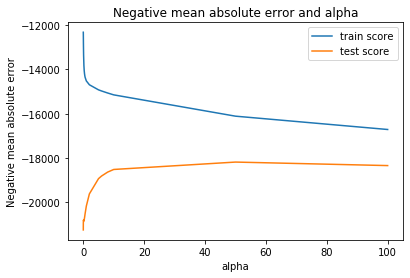

In [1077]:
# Plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('Negative mean absolute error and alpha')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [1078]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([ -6782.24982669,  -2758.27964824,   4182.34023853,  14446.54946838,
         6523.06656016,   6601.13070016,   -243.74839118,    995.13357006,
          135.61717693,    249.10980325,   6301.20598751,  14299.42428565,
        -1186.30019555,  16404.78500827,   4124.41985276,    312.99794688,
         5999.75265253,   1543.81516563,  -4088.51720207,  -3958.51335805,
         5832.56995408,   1751.50545636,  11953.3053315 ,  -2535.37284102,
         1903.68785217,    -55.36143855,    304.91638638,   1267.75660437,
         2082.73484026,   -343.29591635,   -730.88973257,  -7007.59839835,
         1576.14000784,    649.59344404,  -2401.35852676,   6005.37345345,
          913.53080875,   3151.84526859,  -4234.29364053,   3282.89372   ,
       -14649.50596498,   -443.18449379,   7098.45948383,   1267.64776936,
         7490.81370279,   8264.61808874,  -6471.2662298 ,  -2552.46296335,
        -1586.92929163,   4176.20527868,  -7322.96093827,   -621.31062661,
          631.6841296 ,  

In [1079]:
coefficent = pd.Series(ridge.coef_, index = X_train.columns)
coefficent

MSSubClass               -6782.249827
LotFrontage              -2758.279648
LotArea                   4182.340239
OverallQual              14446.549468
OverallCond               6523.066560
MasVnrArea                6601.130700
BsmtFinSF1                -243.748391
BsmtFinSF2                 995.133570
BsmtUnfSF                  135.617177
TotalBsmtSF                249.109803
1stFlrSF                  6301.205988
2ndFlrSF                 14299.424286
LowQualFinSF             -1186.300196
GrLivArea                16404.785008
BsmtFullBath              4124.419853
BsmtHalfBath               312.997947
FullBath                  5999.752653
HalfBath                  1543.815166
BedroomAbvGr             -4088.517202
KitchenAbvGr             -3958.513358
TotRmsAbvGrd              5832.569954
Fireplaces                1751.505456
GarageCars               11953.305331
GarageArea               -2535.372841
WoodDeckSF                1903.687852
OpenPorchSF                -55.361439
EnclosedPorc

In [1080]:
final_sort_ridge = coefficent.reindex(coefficent.abs().sort_values().index)
final_sort_ridge

RoofMatl_Metal              0.000000
GarageQual_Po               0.000000
Electrical_Mix              0.000000
Condition1_RRNe             0.000000
Electrical_SBrkr          -42.456698
OpenPorchSF               -55.361439
Exterior1st_WdShing       -71.277189
ExterQual_Fa              125.968352
BsmtUnfSF                 135.617177
HeatingQC_TA             -144.563813
Exterior2nd_Other         145.845015
Neighborhood_MeadowV     -163.737880
BsmtFinSF1               -243.748391
HeatingQC_Fa              245.335674
TotalBsmtSF               249.109803
BsmtCond_Gd               257.288632
ExterCond_Po             -275.784761
GarageCond_TA             290.745787
Condition2_Norm          -294.779651
Electrical_FuseP          299.012076
EnclosedPorch             304.916386
Electrical_FuseF         -312.707320
BsmtHalfBath              312.997947
GarageType_Attchd         320.221268
PoolArea                 -343.295916
BsmtFinType2_LwQ         -432.718074
LotShape_Reg             -443.184494
E

### Lasso Regression

In [1081]:
from sklearn.linear_model import Lasso
params = {'alpha' : [0.001,0.01,0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.5,0.55,0.6,
                     0.7,0.75,0.8,0.9,1.0,2.0,2.5,3.0,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0,50,90,100,500,1000]}
lasso=Lasso()

# Cross validation
folds=5
model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:   48.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35,
                                   0.4, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.9,
                                   1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 50, 90, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1082]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.347916,0.018414,0.003197,0.001599,0.001,{'alpha': 0.001},-18348.391299,-21508.022745,-19019.603042,-23857.661581,...,-20932.639296,2012.805408,32,-12217.606390,-12866.499998,-12334.446749,-11769.157651,-12410.867171,-12319.715592,352.431309
1,0.327114,0.018305,0.002399,0.001959,0.01,{'alpha': 0.01},-18370.997674,-21505.074187,-19016.391147,-23855.756869,...,-20938.941916,2008.585567,33,-12217.731272,-12866.543259,-12334.535333,-11769.015392,-12411.134831,-12319.792017,352.496548
2,0.331915,0.013141,0.002399,0.001959,0.05,{'alpha': 0.05},-18368.694124,-21491.847993,-19002.245257,-23833.481941,...,-20924.857784,2002.797086,31,-12218.446031,-12866.829999,-12335.009488,-11768.382615,-12412.332822,-12320.200191,352.808285
3,0.335915,0.020390,0.003199,0.001600,0.1,{'alpha': 0.1},-18346.602933,-21475.373742,-18984.755705,-23810.398248,...,-20905.350618,2002.321427,30,-12219.325025,-12867.276140,-12336.050746,-11767.582701,-12413.880326,-12320.822988,353.236253
4,0.324710,0.026453,0.002400,0.001960,0.2,{'alpha': 0.2},-18333.494093,-21441.716956,-18949.876189,-23770.933183,...,-20874.749686,1995.780021,29,-12220.622499,-12868.568224,-12337.862551,-11767.835712,-12417.981423,-12322.574082,353.715899


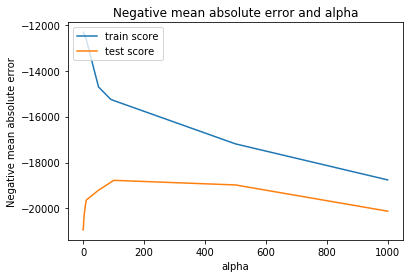

In [1083]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')
# Plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('Negative mean absolute error and alpha')
plt.legend(['train score','test score'],loc='upper left')
plt.show()

In [1084]:
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1085]:
lasso.coef_

array([-5.58451288e+03, -1.71679196e+03,  3.84024113e+03,  1.37656456e+04,
        6.57130666e+03,  5.96047283e+03, -0.00000000e+00,  7.64444122e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.49160477e+03,
       -2.21285472e+03,  2.48613773e+04,  4.18891272e+03,  3.02111475e+02,
        5.73947314e+03,  1.24767123e+03, -3.66668079e+03, -4.17495087e+03,
        5.77920774e+03,  1.71910024e+03,  1.09234023e+04, -2.12782562e+03,
        1.62232084e+03,  3.29795059e+02, -0.00000000e+00,  9.90664565e+02,
        2.24801364e+03, -2.89044337e+02, -6.94071819e+02, -8.20653019e+03,
        0.00000000e+00,  2.68650948e+02, -2.17527666e+03,  2.17298135e+03,
       -0.00000000e+00,  0.00000000e+00, -5.46895504e+03,  1.05945025e+03,
       -2.05590992e+04, -0.00000000e+00,  4.28378253e+03,  0.00000000e+00,
        5.34281456e+03,  1.02899861e+04, -3.45977626e+03, -0.00000000e+00,
       -3.48208556e+00,  1.24907382e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [1086]:
coefficent = pd.Series(lasso.coef_, index = X_train.columns)
coefficent

MSSubClass               -5584.512881
LotFrontage              -1716.791961
LotArea                   3840.241129
OverallQual              13765.645649
OverallCond               6571.306664
MasVnrArea                5960.472828
BsmtFinSF1                  -0.000000
BsmtFinSF2                 764.444122
BsmtUnfSF                    0.000000
TotalBsmtSF                  0.000000
1stFlrSF                     0.000000
2ndFlrSF                  5491.604771
LowQualFinSF             -2212.854724
GrLivArea                24861.377280
BsmtFullBath              4188.912715
BsmtHalfBath               302.111475
FullBath                  5739.473137
HalfBath                  1247.671232
BedroomAbvGr             -3666.680788
KitchenAbvGr             -4174.950865
TotRmsAbvGrd              5779.207741
Fireplaces                1719.100243
GarageCars               10923.402271
GarageArea               -2127.825617
WoodDeckSF                1622.320838
OpenPorchSF                329.795059
EnclosedPorc

In [1087]:
print("Lasso picked " + str(sum(coefficent != 0)) + " variables and eliminated " +  str(sum(coefficent == 0)) + " variables")

Lasso picked 114 variables and eliminated 124 variables


In [1088]:
final_sort_lasso = coefficent.reindex(coefficent.abs().sort_values().index)
final_sort_lasso

Exterior2nd_HdBoard         0.000000
MasVnrType_BrkFace         -0.000000
MasVnrType_ConBrks         -0.000000
ExterQual_Fa               -0.000000
ExterCond_Fa                0.000000
ExterCond_Po               -0.000000
ExterCond_TA                0.000000
Foundation_Slab            -0.000000
Foundation_Stone            0.000000
Foundation_Wood             0.000000
BsmtCond_Gd                 0.000000
BsmtCond_Po                 0.000000
BsmtFinType1_Rec           -0.000000
BsmtFinType2_GLQ           -0.000000
BsmtFinType2_LwQ            0.000000
BsmtFinType2_NoBase        -0.000000
BsmtFinType2_Rec           -0.000000
HeatingQC_Fa                0.000000
HeatingQC_Po               -0.000000
HeatingQC_TA               -0.000000
Exterior2nd_Wd Sdng         0.000000
Electrical_FuseF            0.000000
Exterior2nd_Stone          -0.000000
Exterior2nd_MetalSd         0.000000
RoofStyle_Hip               0.000000
RoofStyle_Mansard           0.000000
RoofStyle_Shed             -0.000000
E

## 8. Subjective Questions

### Question-1

In [1089]:
# 1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double 
# the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Ridge and Lasso Regression

### Ridge Regression

In [1090]:
# The optimal value of alpha is 10....
# Double the value of alpha is 20...

alpha=20
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([ -6797.6097988 ,  -2625.03815251,   3887.54628515,  15391.96171712,
         6590.3580303 ,   7101.68199409,    568.21750312,    948.75001893,
          344.64519831,   1286.74505288,   6326.31641912,  13359.83354973,
        -1287.14242178,  15633.38808855,   4078.94318111,    259.7056645 ,
         5940.54157235,   1690.87617125,  -4122.85410391,  -4055.24036705,
         5956.41046071,   1839.33571614,  11365.18008894,  -1660.69710398,
         2071.81115695,    -63.90875572,    242.14145734,   1104.02795673,
         2171.8594378 ,   -756.08162373,   -719.16323231,  -6876.3568029 ,
         1012.44357595,    643.12123999,  -2549.92532207,   3957.93397679,
          521.50552085,   3037.55011941,  -4686.46591258,   3057.43945961,
       -10140.98338879,   -715.86222361,   5240.25626122,    879.71610887,
         5457.84281275,   7203.28750908,  -4841.85827982,  -1237.17635112,
        -1360.07269582,   3733.94340141,  -4356.88202091,   -341.42451052,
         -233.52976442,  

In [1091]:
coefficent_d = pd.Series(ridge.coef_, index = X_train.columns)
coefficent_d

MSSubClass               -6797.609799
LotFrontage              -2625.038153
LotArea                   3887.546285
OverallQual              15391.961717
OverallCond               6590.358030
MasVnrArea                7101.681994
BsmtFinSF1                 568.217503
BsmtFinSF2                 948.750019
BsmtUnfSF                  344.645198
TotalBsmtSF               1286.745053
1stFlrSF                  6326.316419
2ndFlrSF                 13359.833550
LowQualFinSF             -1287.142422
GrLivArea                15633.388089
BsmtFullBath              4078.943181
BsmtHalfBath               259.705665
FullBath                  5940.541572
HalfBath                  1690.876171
BedroomAbvGr             -4122.854104
KitchenAbvGr             -4055.240367
TotRmsAbvGrd              5956.410461
Fireplaces                1839.335716
GarageCars               11365.180089
GarageArea               -1660.697104
WoodDeckSF                2071.811157
OpenPorchSF                -63.908756
EnclosedPorc

In [1092]:
final_ridge_double = coefficent_d.reindex(coefficent_d.abs().sort_values().index)
final_ridge_double

Electrical_Mix               0.000000
RoofMatl_Metal               0.000000
GarageQual_Po                0.000000
Condition1_RRNe              0.000000
Condition2_Norm            -28.017521
GarageCond_TA               31.038455
ExterCond_Po               -62.522375
Electrical_FuseP            63.069879
OpenPorchSF                -63.908756
ExterCond_TA               -84.020282
BsmtFinType2_LwQ           122.136761
GarageType_Basment         140.408932
SaleCondition_AdjLand      155.222811
Exterior2nd_Other          173.081593
Neighborhood_MeadowV       187.226474
HeatingQC_Fa               211.217072
Neighborhood_BrDale       -233.529764
EnclosedPorch              242.141457
BsmtCond_Gd                255.599816
BsmtHalfBath               259.705665
Exterior2nd_AsphShn       -337.071837
Neighborhood_Blueste      -341.424511
BsmtUnfSF                  344.645198
HeatingQC_TA              -355.475157
Condition2_RRAn            360.345749
SaleType_ConLw            -409.346807
Electrical_F

### Lasso Regression

In [1093]:
# The optimal value of alpha is 100...
# Double the value of alpha is 200...

alpha=200
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-6.73743675e+03, -1.91234919e+03,  3.71087084e+03,  1.54657181e+04,
        6.49447295e+03,  6.09454883e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.80024432e+03,  0.00000000e+00,  5.30283617e+03,
       -2.00139020e+03,  2.42539192e+04,  4.62462210e+03,  2.14383019e+02,
        5.25782180e+03,  9.59461523e+02, -3.49710438e+03, -4.19665631e+03,
        5.39369362e+03,  1.50196878e+03,  9.92009969e+03, -6.36254420e+02,
        1.88550370e+03,  2.85189894e+02, -0.00000000e+00,  6.30546885e+02,
        2.13341505e+03, -1.04416730e+03, -4.99320291e+02, -8.33211735e+03,
       -2.19646483e+02,  1.37871556e+02, -2.56737155e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -6.09356809e+03,  0.00000000e+00,
       -9.37189996e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.46718135e+03,  7.65975743e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [1094]:
coefficent_dl = pd.Series(lasso.coef_, index = X_train.columns)
coefficent_dl

MSSubClass               -6737.436747
LotFrontage              -1912.349188
LotArea                   3710.870835
OverallQual              15465.718077
OverallCond               6494.472948
MasVnrArea                6094.548830
BsmtFinSF1                   0.000000
BsmtFinSF2                   0.000000
BsmtUnfSF                    0.000000
TotalBsmtSF               1800.244324
1stFlrSF                     0.000000
2ndFlrSF                  5302.836174
LowQualFinSF             -2001.390200
GrLivArea                24253.919187
BsmtFullBath              4624.622104
BsmtHalfBath               214.383019
FullBath                  5257.821798
HalfBath                   959.461523
BedroomAbvGr             -3497.104381
KitchenAbvGr             -4196.656305
TotRmsAbvGrd              5393.693618
Fireplaces                1501.968779
GarageCars                9920.099693
GarageArea                -636.254420
WoodDeckSF                1885.503700
OpenPorchSF                285.189894
EnclosedPorc

In [1095]:
final_lasso_double = coefficent_dl.reindex(coefficent_dl.abs().sort_values().index)
final_lasso_double

Exterior2nd_HdBoard        -0.000000
ExterCond_TA                0.000000
Foundation_CBlock           0.000000
Foundation_Slab            -0.000000
Foundation_Stone            0.000000
Foundation_Wood             0.000000
BsmtQual_Fa                -0.000000
BsmtQual_NoBase            -0.000000
BsmtCond_Gd                 0.000000
BsmtCond_NoBase            -0.000000
ExterCond_Po               -0.000000
BsmtCond_Po                 0.000000
BsmtFinType1_LwQ           -0.000000
BsmtFinType1_NoBase        -0.000000
BsmtFinType1_Rec           -0.000000
BsmtFinType2_BLQ           -0.000000
BsmtFinType2_GLQ           -0.000000
BsmtFinType2_LwQ            0.000000
BsmtFinType2_NoBase        -0.000000
BsmtFinType2_Rec           -0.000000
HeatingQC_Fa                0.000000
BsmtExposure_Mn            -0.000000
ExterCond_Gd               -0.000000
ExterCond_Fa                0.000000
ExterQual_Fa               -0.000000
Exterior1st_CBlock         -0.000000
Exterior1st_ImStucc        -0.000000
E

### Subjective Question - 3

In [1096]:
# Question 3

# After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
# You will now have to create another model excluding the five most important predictor variables.
# Which are the five most important predictor variables now?

In [1097]:
df1=pd.read_csv(r"C:\Users\Administrator\Downloads\train.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1098]:
# Dropping the columns with high percentage of missing values
df1=df1.drop('Alley',axis=1)
df1=df1.drop('PoolQC',axis=1)
df1=df1.drop('Fence',axis=1)
df1=df1.drop('MiscFeature',axis=1)
df1=df1.drop('FireplaceQu',axis=1)

# Dropping columns that are highly skewed
df1=df1.drop('Street',axis=1)
df1=df1.drop('Utilities',axis=1)
df1=df1.drop('MoSold',axis=1)

In [1099]:
# Imputing the missing values with mean,median,mode for "continuous variables"
df1['LotFrontage']= df1['LotFrontage'].fillna(df1['LotFrontage'].mean())
df1['MasVnrArea']= df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean())

In [1100]:
# Missing values treatment for "Categorical Variables"(MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,
# GarageType,GarageYrBuilt,GarageFinish,GarageQual,GarageCond)

df1['MasVnrType'] = df1['MasVnrType'].fillna('ConBrks')
df1['BsmtQual'] = df1['BsmtQual'].fillna('NoBase')
df1['BsmtCond'] = df1['BsmtCond'].fillna('NoBase')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('NoBase')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('NoBase')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('NoBase')
df1['Electrical'] = df1['Electrical'].fillna('SBrkr')
df1['GarageType'] = df1['GarageType'].fillna('NoGar')
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna('2005')
df1['GarageFinish'] = df1['GarageFinish'].fillna('NoGar')
df1['GarageQual'] = df1['GarageQual'].fillna('NoGar')
df1['GarageCond'] = df1['GarageCond'].fillna('NoGar')

In [1101]:
# Converting the target variable by performing Log-Transformation
df1['SalePrice']=np.log(df1['SalePrice'])

In [1102]:
# Converting the year columns('YearBuilt,GarageYrBlt,YrSold','YearRemodAdd') to age...
df1['yrblt.age']=df1['YearBuilt'].max()-df1['YearBuilt']
df1['GarageYrBlt'] = df1['GarageYrBlt'].apply(np.int64)
df1['Garyrblt.age']=df1['GarageYrBlt'].max()-df1['GarageYrBlt']
df1['Yrsold.age']=df1['YrSold'].max()-df1['YrSold']
df1['YrremodAdd.age']=df1['YearRemodAdd'].max()-df1['YearRemodAdd']

In [1103]:
# Dropping the columns'YearBuilt,GarageYrBlt,YrSold,YearRemodAdd'
df1=df1.drop('YearBuilt',axis=1)
df1=df1.drop('GarageYrBlt',axis=1)
df1=df1.drop('YrSold',axis=1)
df1=df1.drop('YearRemodAdd',axis=1)

#### Converting binary variables (Yes/No) to 0/1

In [1104]:
# List of variables
varlist=['CentralAir']

# Appling map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})
# Appling the function to the list
df1[varlist]=df1[varlist].apply(binary_map)

#### For categorical variables with multiple lavels, creating dummies

In [1105]:
col1=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Condition2','RoofMatl','Heating']
status=pd.get_dummies(df1[col1],drop_first=True)
status.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall'],
      dtype='object', length=203)

In [1106]:
# Concatinating original with status
df1=pd.concat([df1,status],axis=1)
col= df1.columns

In [1107]:
# Dropping original columns after creating dummies
df1=df1.drop(columns=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Condition2','RoofMatl','Heating'])
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,0,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,0,0,1,0,0,0,0


In [1108]:
df1.shape

(1460, 240)

In [1109]:
# Dropping the five most predictor variable
df1=df1.drop('RoofMatl_WdShngl',axis=1)
df1=df1.drop('Neighborhood_NoRidge',axis=1)
df1=df1.drop('Neighborhood_StoneBr',axis=1)
df1=df1.drop('KitchenQual_Gd',axis=1)
df1=df1.drop('GrLivArea',axis=1)

In [1110]:
df1.shape

(1460, 235)

### Feature Scaling

In [1111]:
from sklearn.preprocessing import StandardScaler

In [1112]:
scaler=StandardScaler()
df1[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','ScreenPorch','MiscVal','yrblt.age','Yrsold.age','Garyrblt.age','YrremodAdd.age']]=scaler.fit_transform(df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','ScreenPorch','MiscVal','yrblt.age','Yrsold.age','Garyrblt.age','YrremodAdd.age']])
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,...,0,0,0,0,0,1,0,0,0,0
1,2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,...,0,0,0,0,0,1,0,0,0,0
2,3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,...,0,0,0,0,0,1,0,0,0,0
3,4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,...,0,0,0,0,0,1,0,0,0,0
4,5,0.073375,0.633618,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,...,0,0,0,0,0,1,0,0,0,0


### Splitting into train and test

In [1113]:
import sklearn
from sklearn.model_selection import train_test_split

In [1114]:
# Putting feature variable to X
X = df1.drop(['Id','SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,-0.459303,...,0,0,0,0,0,1,0,0,0,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,0.466465,...,0,0,0,0,0,1,0,0,0,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,-0.313369,...,0,0,0,0,0,1,0,0,0,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,...,0,0,0,0,0,1,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,0.199680,...,0,0,0,0,0,1,0,0,0,0


In [1115]:
# Putting response variable to y
y = df1['SalePrice']
y = np.exp(y)
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [1116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [1117]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
175,-0.872563,6.336182e-01,0.210283,-0.071836,1.280685,-0.57441,0.073168,-0.288653,0.357152,0.329652,...,0,0,0,0,0,1,0,0,0,0
1408,0.309859,-4.564744e-01,-0.278299,-1.518467,1.280685,-0.57441,-0.973018,-0.288653,0.123970,-0.992873,...,0,0,0,0,0,1,0,0,0,0
1148,-0.163109,2.378757e-16,-0.482752,0.651479,1.280685,-0.57441,-0.973018,-0.288653,0.010775,-1.106884,...,0,0,0,0,0,1,0,0,0,0
861,3.147673,2.248335e-01,0.111063,-0.795151,-1.416142,-0.57441,0.871515,-0.288653,-0.835923,-0.042023,...,0,0,0,0,0,1,0,0,0,0
220,-0.872563,1.339924e-01,-0.153022,0.651479,-0.517200,-0.57441,-0.973018,-0.288653,2.107147,1.004596,...,0,0,0,0,0,1,0,0,0,0


In [1118]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
930,-0.872563,0.133992,-0.159536,1.374795,-0.517200,-0.574410,-0.937926,-0.288653,1.998480,0.931629,...,0,0,0,0,0,1,0,0,0,0
530,0.546344,0.679039,-0.031753,-0.071836,-0.517200,0.638837,0.744306,-0.288653,0.250749,0.920228,...,0,0,0,0,0,1,0,0,0,0
1291,2.438219,-2.227875,-0.885645,-0.795151,1.280685,0.910294,-0.466375,-0.288653,-0.380879,-0.974631,...,0,0,0,0,0,1,0,0,0,0
1385,-0.163109,-1.364885,-0.509211,-1.518467,2.179628,-0.574410,0.639029,-0.288653,-1.146078,-0.596115,...,0,0,0,0,0,1,0,0,0,0
305,-0.872563,0.451936,-0.013112,1.374795,-0.517200,0.788416,2.237917,-0.288653,-0.070725,2.149264,...,0,0,0,0,0,1,0,0,0,0


In [1119]:
y_train.head()

175     243000.0
1408    125500.0
1148    116900.0
861     131500.0
220     204900.0
Name: SalePrice, dtype: float64

In [1120]:
y_test.head()

930     201000.0
530     175000.0
1291    119500.0
1385    125500.0
305     305900.0
Name: SalePrice, dtype: float64

### Ridge and Lasso Regression

### Ridge Regression

In [1121]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# List of alpha to tune
params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,1.0,2.0,5.0,6.0,8.0,10.0,50,100,500]}
ridge=Ridge()

# Cross validation
folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 1.0, 2.0, 5.0, 6.0, 8.0, 10.0,
                                   50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1122]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018396,0.001957,0.001599,0.001959,0.0001,{'alpha': 0.0001},-24179.544357,-22047.328003,-23088.465038,-25448.466359,...,-23667.903579,1131.209303,19,-15022.605757,-16120.653056,-15914.016611,-12120.488866,-15711.145215,-14977.781901,1475.577468
1,0.017596,0.001960,0.003999,0.000001,0.001,{'alpha': 0.001},-24171.816021,-22034.205896,-23081.018049,-25432.719166,...,-23655.569383,1130.375701,18,-15022.960090,-16120.197840,-15914.087969,-12120.158859,-15711.956295,-14977.872211,1475.726651
2,0.015197,0.002992,0.003200,0.001600,0.01,{'alpha': 0.01},-24097.912309,-21914.888928,-23015.607868,-25290.057114,...,-23544.436862,1122.898497,17,-15026.009587,-16120.268356,-15917.719124,-12119.273290,-15719.327979,-14980.519667,1477.295351
3,0.013598,0.003200,0.000800,0.001601,0.05,{'alpha': 0.05},-23826.608990,-21534.617884,-22785.131702,-24936.517720,...,-23212.703089,1131.197498,16,-15034.463139,-16136.400682,-15939.437892,-12140.494604,-15746.798150,-14999.518893,1477.133386
4,0.015998,0.003584,0.000804,0.001608,0.1,{'alpha': 0.1},-23578.983961,-21195.355616,-22632.153020,-24716.574336,...,-22951.074921,1165.707965,15,-15042.120966,-16152.725477,-15947.968330,-12169.224666,-15775.543422,-15017.516572,1472.577101


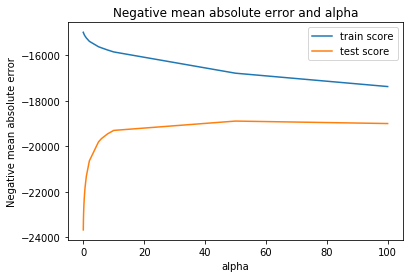

In [1123]:
# Plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('Negative mean absolute error and alpha')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [1124]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([ -7033.10310645,  -2934.08795557,   4241.48148355,  16429.20752607,
         6138.71705846,   7619.31625119,    894.23052709,    892.28404747,
          292.61487241,   1552.51430659,  18140.44676256,  28253.94059482,
          153.4966021 ,   3951.18913433,    264.26768908,   5654.21131618,
         1836.66446318,  -4417.42011632,  -3916.22259859,   5948.02980006,
         1524.11614105,  12372.13610651,  -2673.9748561 ,   2069.51164557,
         -515.48556096,    358.02825635,   1251.19440027,   2188.60662119,
         -452.53434202,   -794.47775414,  -6911.98098175,   1641.06800084,
          867.47527287,  -1906.03405307,   4015.6056411 ,   1362.73897456,
         4602.71052206,  -4588.0313712 ,   4061.93040259, -16939.18306118,
         -745.17027311,   7864.82255607,   1874.21539355,   7267.10097392,
         9136.00418646,  -6101.80172843,  -2307.70827215,  -1259.40442275,
         4005.30360032,  -7040.29816837,   -802.15198261,   -791.61012651,
         4342.03154993,  

In [1125]:
coefficent_r = pd.Series(ridge.coef_, index = X_train.columns)
coefficent_r

MSSubClass               -7033.103106
LotFrontage              -2934.087956
LotArea                   4241.481484
OverallQual              16429.207526
OverallCond               6138.717058
MasVnrArea                7619.316251
BsmtFinSF1                 894.230527
BsmtFinSF2                 892.284047
BsmtUnfSF                  292.614872
TotalBsmtSF               1552.514307
1stFlrSF                 18140.446763
2ndFlrSF                 28253.940595
LowQualFinSF               153.496602
BsmtFullBath              3951.189134
BsmtHalfBath               264.267689
FullBath                  5654.211316
HalfBath                  1836.664463
BedroomAbvGr             -4417.420116
KitchenAbvGr             -3916.222599
TotRmsAbvGrd              5948.029800
Fireplaces                1524.116141
GarageCars               12372.136107
GarageArea               -2673.974856
WoodDeckSF                2069.511646
OpenPorchSF               -515.485561
EnclosedPorch              358.028256
3SsnPorch   

In [1126]:
final_sort_ridge = coefficent_r.reindex(coefficent_r.abs().sort_values().index)
final_sort_ridge

Condition1_RRNe              0.000000
RoofMatl_Metal               0.000000
GarageQual_Po                0.000000
Electrical_Mix               0.000000
GarageCond_TA               38.798899
ExterQual_Fa                51.552028
HeatingQC_TA               130.454719
BsmtCond_Gd                146.562204
LowQualFinSF               153.496602
HeatingQC_Fa               180.851793
ExterCond_Po               191.622807
GarageCond_Po             -245.198702
BsmtHalfBath               264.267689
BsmtUnfSF                  292.614872
SaleCondition_AdjLand      317.078819
EnclosedPorch              358.028256
Neighborhood_Somerst       358.640901
Exterior2nd_AsphShn       -400.820220
Exterior1st_Stone         -403.238230
Heating_Grav              -428.583567
PoolArea                  -452.534342
SaleType_ConLw            -497.549193
OpenPorchSF               -515.485561
Electrical_FuseF          -523.151044
Electrical_FuseP           536.215300
BsmtFinType1_Rec          -575.946640
KitchenQual_

### Lasso Regression

In [1127]:
from sklearn.linear_model import Lasso
params = {'alpha' : [0.001,0.01,0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.5,0.55,0.6,
                     0.7,0.75,0.8,0.9,1.0,2.0,2.5,3.0,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0,50,90,100,500,1000]}
lasso=Lasso()

# Cross validation
folds=5
model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:   40.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35,
                                   0.4, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.9,
                                   1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 50, 90, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1128]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.312716,0.033115,0.002400,0.001959,0.001,{'alpha': 0.001},-24199.507233,-22026.982033,-23113.295313,-25377.935757,...,-23659.406761,1114.476210,33,-15021.752870,-16119.333427,-15909.747386,-12116.253899,-15710.759484,-14975.569413,1476.428608
1,0.305520,0.007427,0.002399,0.001959,0.01,{'alpha': 0.01},-24168.028552,-22024.021590,-23111.392838,-25382.013676,...,-23655.458996,1113.633403,32,-15021.787382,-16119.238294,-15909.805477,-12116.005601,-15710.808869,-14975.529125,1476.522528
2,0.285138,0.023636,0.003999,0.000010,0.05,{'alpha': 0.05},-24163.778020,-22011.323453,-23102.603568,-25393.544557,...,-23650.620701,1121.511357,31,-15021.791669,-16119.051315,-15910.193667,-12115.153083,-15710.929438,-14975.423834,1476.884944
3,0.306321,0.011478,0.001600,0.001960,0.1,{'alpha': 0.1},-24198.965881,-21995.324508,-23091.804960,-25377.198848,...,-23639.638073,1126.296695,30,-15021.779671,-16118.817373,-15910.689754,-12114.282278,-15711.189255,-14975.351666,1477.274634
4,0.299124,0.009926,0.002403,0.001962,0.2,{'alpha': 0.2},-24231.156358,-21964.010905,-23070.404442,-25345.253179,...,-23621.712742,1131.864769,29,-15021.805560,-16118.800015,-15911.538594,-12114.171528,-15711.550926,-14975.573325,1477.458557


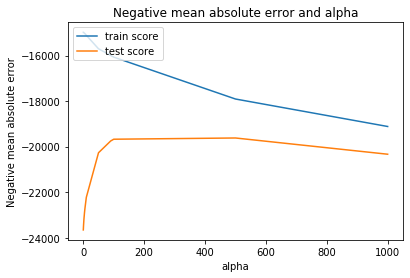

In [1129]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')
# Plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('Negative mean absolute error and alpha')
plt.legend(['train score','test score'],loc='upper left')
plt.show()

In [1130]:
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1131]:
lasso.coef_

array([-5.58767932e+03, -2.25529564e+03,  4.30484542e+03,  1.64925214e+04,
        6.05411515e+03,  7.28989948e+03,  3.42203775e+02,  0.00000000e+00,
       -0.00000000e+00,  1.68127767e+03,  1.95270749e+04,  2.90090734e+04,
       -0.00000000e+00,  4.49782215e+03,  3.22021280e+02,  4.99044200e+03,
        1.26857232e+03, -3.98251552e+03, -4.00174287e+03,  4.48903618e+03,
        1.23610748e+03,  1.19767103e+04, -2.74283871e+03,  1.88385832e+03,
       -2.35574309e+02, -0.00000000e+00,  1.03636677e+03,  2.26261700e+03,
       -7.76259075e+02, -7.85938210e+02, -8.15724660e+03,  0.00000000e+00,
        7.65849790e+02, -1.66915441e+03,  0.00000000e+00, -0.00000000e+00,
        2.59405233e+03, -6.19356122e+03,  4.08567450e+02, -2.80108205e+04,
       -6.89705945e+02,  6.58924147e+03,  0.00000000e+00,  6.30187516e+03,
        1.10543238e+04, -2.77175216e+03, -0.00000000e+00, -0.00000000e+00,
        1.64153597e+03, -6.73574806e+02, -0.00000000e+00, -0.00000000e+00,
        4.41716793e+03, -

In [1132]:
coefficent_l = pd.Series(lasso.coef_, index = X_train.columns)
coefficent_l

MSSubClass               -5587.679319
LotFrontage              -2255.295638
LotArea                   4304.845422
OverallQual              16492.521358
OverallCond               6054.115148
MasVnrArea                7289.899479
BsmtFinSF1                 342.203775
BsmtFinSF2                   0.000000
BsmtUnfSF                   -0.000000
TotalBsmtSF               1681.277667
1stFlrSF                 19527.074887
2ndFlrSF                 29009.073425
LowQualFinSF                -0.000000
BsmtFullBath              4497.822152
BsmtHalfBath               322.021280
FullBath                  4990.442000
HalfBath                  1268.572323
BedroomAbvGr             -3982.515516
KitchenAbvGr             -4001.742874
TotRmsAbvGrd              4489.036184
Fireplaces                1236.107482
GarageCars               11976.710278
GarageArea               -2742.838707
WoodDeckSF                1883.858322
OpenPorchSF               -235.574309
EnclosedPorch               -0.000000
3SsnPorch   

In [1133]:
print("Lasso picked " + str(sum(coefficent_l != 0)) + " variables and eliminated " +  str(sum(coefficent_l == 0)) + " variables")

Lasso picked 112 variables and eliminated 121 variables


In [1134]:
final_sort_lasso = coefficent_l.reindex(coefficent_l.abs().sort_values().index)
final_sort_lasso

Heating_Wall                0.000000
Exterior1st_Stone          -0.000000
Exterior1st_Stucco         -0.000000
Exterior1st_VinylSd         0.000000
Exterior1st_WdShing        -0.000000
Exterior2nd_AsphShn        -0.000000
Exterior2nd_Brk Cmn        -0.000000
Exterior2nd_BrkFace         0.000000
Exterior1st_Plywood         0.000000
Exterior2nd_CBlock         -0.000000
Heating_OthW               -0.000000
Exterior2nd_MetalSd         0.000000
Exterior2nd_Other           0.000000
Exterior2nd_Stone          -0.000000
PavedDrive_P                0.000000
Exterior2nd_VinylSd         0.000000
Exterior2nd_Wd Sdng        -0.000000
Exterior2nd_CmentBd         0.000000
GarageCond_TA              -0.000000
Exterior1st_MetalSd         0.000000
Exterior1st_HdBoard        -0.000000
SaleType_ConLw             -0.000000
SaleType_ConLI             -0.000000
HouseStyle_1.5Unf           0.000000
SaleType_ConLD              0.000000
HouseStyle_2.5Unf          -0.000000
SaleType_Con                0.000000
H